In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
echonest_audio_features=pd.read_csv("C:\\Users\\lenovo\\PycharmProjects\\Music-genre-classification\\echonest_audio_features.csv",index_col=0)
echonest_audio_features.head(10)

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
Track_ID,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
139,0.106550,0.260911,0.607067,0.835087,0.223676,0.030569,196.961,0.160267
140,0.376312,0.734079,0.265685,0.669581,0.085995,0.039068,107.952,0.609991
141,0.963657,0.435933,0.075632,0.345493,0.105686,0.026658,33.477,0.163950
142,0.662881,0.379065,0.823856,0.910266,0.088705,0.079090,147.781,0.092868


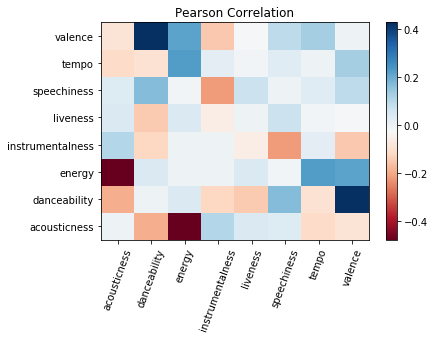

In [3]:
#checking correlation between 2 datasets
def correlationHeatMap(dataset):
    c_mat = dataset.corr()
    for i in range(c_mat.shape[0]):
        c_mat.iloc[i,i] = 0
    fig, ax = plt.subplots()
    heatmap = ax.pcolor(c_mat, cmap=plt.cm.RdBu)
    ax.set_xticks(np.arange(c_mat.shape[0])+0.5, minor=False)
    ax.set_yticks(np.arange(c_mat.shape[1])+0.5, minor=False)
    ax.set_xticklabels(c_mat.index.values,  rotation = 70, minor=False)
    ax.set_yticklabels(c_mat.index.values, minor=False)
    plt.title('Pearson Correlation')
    cbar = plt.colorbar(heatmap)
    plt.show()

correlationHeatMap(echonest_audio_features)

In [5]:
#checking for skewed columns
ready_data=pd.read_csv("C:\\Users\\lenovo\\PycharmProjects\\Music-genre-classification\\ready_data.csv",index_col=0)
def skewColumns(dataset, target):
    dataset=dataset.drop(target,axis=1)
    sk_columns=(dataset.skew().sort_values(ascending=False))
    sk_columns=sk_columns.loc[sk_columns>0.75]
    print(sk_columns)
    return sk_columns
def skewTransform(dataset, target):
    s_columns=skewColumns(dataset,target)
    for col in s_columns.index.tolist():
        dataset[col]=np.log1p(dataset[col])
    return dataset
echonest_audio=skewTransform(ready_data,'Target_Genre')



speechiness    3.422018
liveness       2.279073
dtype: float64


In [10]:
#scaling feature values
from sklearn.preprocessing import StandardScaler
def featureScaling(dataset,target):
    sc=StandardScaler()
    dataset_scaled=pd.DataFrame(sc.fit_transform(dataset.drop(target,axis=1)),index=dataset.index,columns=(dataset.drop(target,axis=1).columns)
    dataset_scaled[target] = dataset[target]
    return dataset_scaled
echonest_audio=featuresScaling(ready_data,'Target_Genre')

SyntaxError: invalid syntax (<ipython-input-10-ee6e3f4ba43f>, line 6)

In [15]:
#Scaling the feature values to ensure uniformity
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
echonest_audio = pd.DataFrame(sc.fit_transform(ready_data.drop('Target_Genre', axis=1)), 
                                  index = ready_data.index, columns = ready_data.drop('Target_Genre', axis=1).columns)
echonest_audio['Target_Genre']=ready_data['Target_Genre']
print("Data after scaling : ")
echonest_audio.head()

Data after scaling : 


,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,Target_Genre
Track_ID,,,,,,,,,
2,-0.305190,1.081472,0.335174,-1.802354,-0.033418,0.547961,1.209559,0.520177,5
3,-0.414637,0.309857,0.981693,-1.826925,-0.555945,2.734133,0.105597,-0.594694,5
5,-1.271315,1.446562,0.571875,-1.830157,1.242922,0.261302,-0.650787,0.683372,5
10,1.080124,0.988641,1.359970,0.870650,-0.484161,-0.539885,-0.330577,1.923387,10
134,-0.213157,0.229133,0.073484,-1.777677,-0.626228,3.136317,-0.253287,1.671279,5


acousticness -> 0.3639568852190641

danceability -> 0.17271580390780825

energy -> 0.1327569935906687

instrumentalness -> 0.08380756663017316

liveness -> 0.030013107125120297

speechiness -> 0.16654761875457222

tempo -> 0.022683662720733244

valence -> 0.02751836205185997



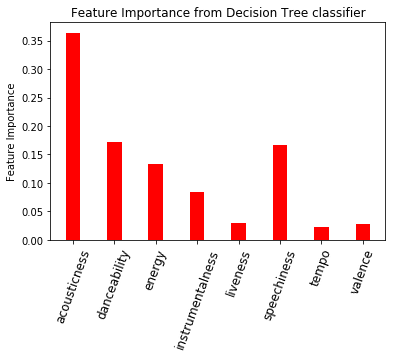

In [18]:
#Determining Feature Importance using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=100,max_depth=20)
clf = clf.fit(echonest_audio.drop('Target_Genre', axis =1), echonest_audio['Target_Genre'])
#sklearn also has build-in means to check which feature contributes more to the prediction.
importances = clf.feature_importances_
features = list(echonest_audio.columns)
features = features[:-1]

fig, ax = plt.subplots()
width = 0.35
ax.bar(range(len(importances)), importances, width, color='r')
ax.set_xticks(np.arange(len(clf.feature_importances_)))
ax.set_xticklabels(echonest_audio.drop('Target_Genre',1).columns.tolist(), rotation = 70, fontsize='large')
plt.title('Feature Importance from Decision Tree classifier')
ax.set_ylabel('Feature Importance')
for i in range(len(features)):
    print("{} -> {}\n".format(features[i],importances[i]))

In [19]:
#Supervised learning approach
from sklearn.model_selection import train_test_split

#splitting the data into train and test
train,test = train_test_split(echonest_audio,test_size = 0.3,random_state = 100)

x_train = train.drop('Target_Genre', axis=1)
y_train = train['Target_Genre']
x_test = test.drop('Target_Genre', axis =1)
y_test = test['Target_Genre']

In [20]:
#Hypertuning the parameters for the GradientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

error_list = list()

# Iterate through all of the possibilities for number of estimators
tree_list = [15, 50, 100, 200, 400]
for n_trees in tree_list:
    
    # Initialize the gradient boost classifier
    GBC = GradientBoostingClassifier(n_estimators=n_trees, 
                                     subsample=0.5,
                                     max_features=4,
                                     random_state=42)

    # Fit the model
    GBC.fit(x_train.values, y_train.values)
    y_pred = GBC.predict(x_test)

    # Get the error
    error = 1. - accuracy_score(y_test, y_pred)
    
    # Store it
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))

error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')

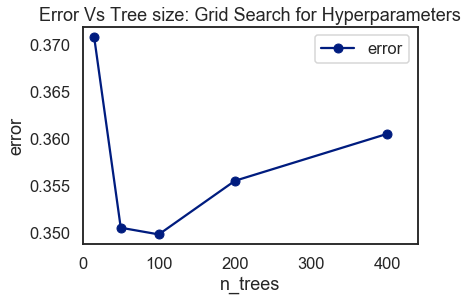

In [21]:
#Finding the optimal number of trees for GradientBoosting by plotting the error vs number of trees
import seaborn as sns

sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')


ax = error_df.plot(marker='o')

ax.set(title='Error Vs Tree size: Grid Search for Hyperparameters')
ax.set(xlabel='n_trees', ylabel='error')
ax.set_xlim(0, max(error_df.index)*1.1);

In [22]:

from sklearn.model_selection import GridSearchCV

#range of parameters for training the model
param_grid = {'n_estimators': [50,100,200,400],
              'learning_rate': [0.1, 0.01]}

# Grid search for Hyper Parameters
GV_GBC = GridSearchCV(GradientBoostingClassifier(subsample=0.5,
                                                 max_features=4,
                                                 random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# fitting the data to perform grid search
GV_GBC = GV_GBC.fit(x_train, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [23]:
from sklearn.metrics import classification_report

#predict using the grid search
y_pred_gbc = GV_GBC.predict(x_test)
accuracy_xgb = accuracy_score(y_test,y_pred_gbc)
print("Accuracy for GradientBoosting is {}".format(accuracy_xgb*100))
print("\nClassification report for GradientBoosting : ")
print(classification_report(y_pred, y_test))

Accuracy for GradientBoosting is 65.22978268614179

Classification report for GradientBoosting : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.63      0.70      0.66        81
           2       0.62      0.67      0.65       618
           3       0.00      0.00      0.00         5
           4       0.38      0.41      0.40       252
           5       0.62      0.67      0.64       241
           6       0.00      0.00      0.00         3
           7       0.08      0.15      0.11        20
           8       0.08      0.17      0.11        36
           9       0.87      0.88      0.88       108
          10       0.09      0.30      0.14        30
          11       0.83      0.67      0.74      1409

   micro avg       0.64      0.64      0.64      2807
   macro avg       0.35      0.39      0.36      2807
weighted avg       0.69      0.64      0.66      2807

